<a href="https://colab.research.google.com/github/FarrazNouval/ml_zoomcamp/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Regression

1. EDA
* load the data
* does median house value have a long tail?

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-15 16:32:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.7’

housing.csv.7       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-15 16:32:35 (19.0 MB/s) - ‘housing.csv.7’ saved [1423529/1423529]



In [2]:
import pandas as pd

df = pd.read_csv('./housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([  4.,   1.,   0.,   4.,   3.,   2.,   2.,   7.,   5.,   8.,  14.,
         34.,  29.,  61.,  67.,  98., 149., 125., 132., 132., 138., 185.,
        172., 181., 145., 113., 128., 160., 170., 236., 193., 204., 260.,
        222., 211., 188., 178., 159., 181., 188., 280., 173., 192., 167.,
        186., 174., 167., 188., 164., 187., 275., 210., 231., 197., 193.,
        194., 214., 205., 245., 257., 334., 229., 216., 181., 205., 237.,
        147., 197., 191., 216., 190., 220., 221., 182., 154., 146., 142.,
        110., 137., 116., 137., 166., 144., 173., 165., 138., 215., 143.,
        156., 154., 137., 131., 140., 132., 130., 106., 134.,  93., 117.,
         93.,  96., 104., 117., 117., 107., 116., 101., 139.,  83.,  90.,
         82.,  76.,  90.,  77.,  75.,  78.,  43.,  69.,  49.,  55.,  49.,
         50.,  60.,  65.,  41.,  64.,  62.,  65.,  56.,  55.,  65.,  69.,
         74.,  44.,  73.,  61.,  54.,  53., 118.,  61.,  46.,  45.,  51.,
         51.,  43.,  51.,  32.,  34., 

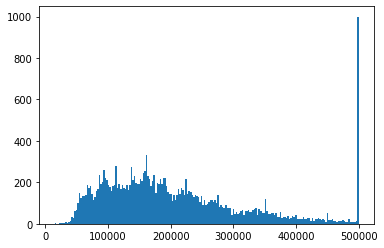

In [4]:
plt.hist(x=df.median_house_value, bins=200)


Yes, it has a long tail, and right skewed

In this homework, i will use only these columns:

* 'latitude'
* 'longitude'
* 'housing_median_age'
* 'total_rooms'
* 'total_bedrooms' 
* 'population' 
* 'households' 
* 'median_income'
* 'median_house_value'

In [5]:
df = df[['latitude', 'longitude',
           'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population',
           'households', 'median_income',
           'median_house_value']]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Find a feature with missing values. How many missing values does it have?

In [6]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

It has 207 missing values.

What's the median (50% percentile) for variable 'population'?

In [7]:
df.population.median()


1166.0

Median value for population column is 1166.

Split the data
* Shuffle the initial dataset, use seed 42.
* Split the data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function

In [8]:
import numpy as np

np.random.seed(42)

n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - (n_train + n_val)

idx = np.arange(n)
shuffle_idx = np.random.shuffle(idx)

new_df = df.iloc[idx]

new_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
11284,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [9]:
train_data = new_df.iloc[:n_train].copy()
val_data = new_df.iloc[n_train : n_train + n_val].copy()
test_data = new_df.iloc[n_train + n_val:].copy()


In [10]:
y_train1 = train_data['median_house_value'].values
y_val1 = val_data['median_house_value'].values
y_test1 = test_data['median_house_value'].values

y_train = np.log1p(y_train1)
y_val = np.log1p(y_val1)
y_test = np.log1p(y_test1)

In [11]:
train_data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [12]:
val_data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19660,37.51,-120.85,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
4415,34.09,-118.25,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
18113,37.31,-122.02,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
17673,37.30,-121.88,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
16992,37.56,-122.27,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0


In [13]:
test_data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9221,37.13,-120.26,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
10234,33.86,-117.91,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
4763,34.04,-118.36,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
9062,34.69,-118.15,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
1874,38.93,-119.97,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0


In [14]:
del train_data['median_house_value']
del val_data['median_house_value']
del test_data['median_house_value']

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options.For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [15]:
def fill_X(data, num):
  df_to_fill = data
  df_to_fill = df_to_fill.fillna(num)
  X = df_to_fill.values

  return X


In [16]:
train_features_0 = fill_X(train_data, 0)

In [17]:
def train_linear_regression(X, y): 
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0], w[1:]

In [18]:
w0, w = train_linear_regression(train_features_0, y_train)
y_pred_0 = train_features_0.dot(w) + w0

In [19]:
def rmse(y_true, y_pred):
  se = (y_true - y_pred) ** 2
  rmse = np.sqrt(se.mean())
  return round(rmse, 2)

In [20]:
rmse_fill_0 = rmse(y_train, y_pred_0)
rmse_fill_0

0.34

In [21]:
train_features_mean = fill_X(train_data, y_train.mean())
w0, w = train_linear_regression(train_features_mean, y_train)

In [22]:
y_pred_mean = train_features_mean.dot(w) + w0
rmse(y_train, y_pred_mean) 

0.34

In [23]:
w0, w = train_linear_regression(val_data, y_val)
y_preds = val_data.dot(w) + w0
rmse(y_val, y_preds)

0.33

* Now let's train regulized linear regression.
* For this question, fill NAs with 0.
* Try different values of r [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use rmse to evaluate the model on val data.
* round rmse to 2 score decimal digit.
* wich r gives better rmse?

In [24]:
def linreg_regularized(X, y, r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0], w[1:]

In [25]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

rmse_regul = []
val_rmse_regul = []

for i in r:
  w0, w = linreg_regularized(train_features_0, y_train, i)
  w0_r, wr = linreg_regularized(val_data, y_val, i)
  y_preds_t = train_features_0.dot(w) + w0
  y_preds_v = val_data.dot(wr) + w0_r
  train_rmse = rmse(y_train, y_preds_t)
  val_rmse = rmse(y_val, y_preds_v)
  rmse_regul.append(train_rmse)
  val_rmse_regul.append(val_rmse)

print(rmse_regul)
print(val_rmse_regul)


[0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.35, 0.35, 0.35]
[0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34, 0.34]


* We used seed 42 fr splitting data, let's find out how seed influence our score.
* Try different seed values [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
* For each seed  split the data with 60/20/20 ratio.
* Fill the missing values with 0, and train linear regression without regularization.
* For each seed evaluate the model on the validation dataset and collect rmse scores.
* What standard deviation of all the scores? To compute the standard deviation use np.std.
* Round the result to 3 decimal digits.

In [26]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def test_seed(data, seeds):
  df = []
  for i in seeds:
    np.random.seed(i)
    n = len(data)
    
    idx = np.arange(n)
    shuffle_idx = np.random.shuffle(idx)
    
    new_df = data.iloc[idx]
    df.append(new_df)
  return df

In [27]:
dfs = test_seed(df, seeds)
df_0 = dfs[0]
df_1 = dfs[1]
df_2 = dfs[2]
df_3 = dfs[3]
df_4 = dfs[4]
df_5 = dfs[5]
df_6 = dfs[6]
df_7 = dfs[7]
df_8 = dfs[8]
df_9 = dfs[9]

In [28]:
def split_data(data):
  n = len(data)
  n_train = int(n * 0.6)
  n_val = int(n * 0.2)
  n_test = n - (n_train + n_val)

  train_data = data.iloc[:n_train].copy()
  val_data = data.iloc[n_train : n_train + n_val].copy()
  test_data = data.iloc[n_train + n_val:].copy()

  y_train1 = train_data['median_house_value'].values
  y_val1 = val_data['median_house_value'].values
  y_test1 = test_data['median_house_value'].values

  y_train = np.log1p(y_train1)
  y_val = np.log1p(y_val1)
  y_test = np.log1p(y_test1)

  del train_data['median_house_value']
  del val_data['median_house_value']
  del test_data['median_house_value']

  return train_data, y_train, val_data, y_val, test_data, y_test 


In [29]:
train_data_0, y_train_0, val_data_0, y_val_0, test_data_0, y_test_0 = split_data(df_0)
train_data_1, y_train_1, val_data_1, y_val_1, test_data_1, y_test_1 = split_data(df_1)
train_data_2, y_train_2, val_data_2, y_val_2, test_data_2, y_test_2 = split_data(df_2)
train_data_3, y_train_3, val_data_3, y_val_3, test_data_3, y_test_3 = split_data(df_3)
train_data_4, y_train_4, val_data_4, y_val_4, test_data_4, y_test_4 = split_data(df_4)
train_data_5, y_train_5, val_data_5, y_val_5, test_data_5, y_test_5 = split_data(df_5)
train_data_6, y_train_6, val_data_6, y_val_6, test_data_6, y_test_6 = split_data(df_6)
train_data_7, y_train_7, val_data_7, y_val_7, test_data_7, y_test_7 = split_data(df_7)
train_data_8, y_train_8, val_data_8, y_val_8, test_data_8, y_test_8 = split_data(df_8)
train_data_9, y_train_9, val_data_9, y_val_9, test_data_9, y_test_9 = split_data(df_9)

In [30]:
x = fill_X(train_data_0, 0)
w0, w = train_linear_regression(x, y_train_0)
y_preds = x.dot(w) + w0
rmse(y_train_0, y_preds)

0.34

In [31]:
val_data_0.isna().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        32
population             0
households             0
median_income          0
dtype: int64

In [33]:
train_data_0.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        128
population              0
households              0
median_income           0
dtype: int64

In [34]:
train_datas = [train_data_0, train_data_1, train_data_2, train_data_3,
               train_data_4, train_data_5, train_data_6,
               train_data_7, train_data_8, train_data_9]

val_datas = [val_data_0, val_data_1, val_data_2, val_data_3,
             val_data_4, val_data_5, val_data_6,
             val_data_7, val_data_8, val_data_9]

y_trains = [y_train_0, y_train_1, y_train_2, y_train_3, 
            y_train_4, y_train_5, y_train_6, 
            y_train_7, y_train_8, y_train_9]

y_vals = [y_val_0, y_val_1, y_val_2, y_val_3,
          y_val_4, y_val_5, y_val_6,
          y_val_7, y_val_8, y_val_9]

def rmse_3(y_true, y_pred):
  se = (y_true - y_pred) ** 2
  rmse = np.sqrt(se.mean())
  return rmse

def calculate_rmse(train=train_datas, val=val_datas, yt=y_trains, yval=y_vals):
  train_rmse_list = []
  val_rmse_list = []

  for i, j, k, l in zip(train, val, yt, yval):
    i = fill_X(i, 0)
    j = fill_X(j, 0)

    w0, w = train_linear_regression(i, k)
    w0_v, wv = train_linear_regression(j, l)

    y_preds_t = i.dot(w) + w0
    y_preds_v = j.dot(wv) + w0_v

    train_rmse = rmse_3(k, y_preds_t)
    val_rmse = rmse_3(l, y_preds_v)

    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)

  return np.array(train_rmse_list), np.array(val_rmse_list)  



In [35]:
train_rmse_list, val_rmse_list = calculate_rmse()
train_rmse_list, val_rmse_list

(array([0.34289367, 0.34347495, 0.34144289, 0.34245931, 0.34318733,
        0.34185207, 0.33909316, 0.33991943, 0.33666582, 0.3409704 ]),
 array([0.33838995, 0.33568021, 0.33080957, 0.33957982, 0.33556149,
        0.34206343, 0.34307894, 0.33869411, 0.34493882, 0.3346604 ]))

In [36]:
round(np.std(val_rmse_list), 3)

0.004

* Split the data like previously.
* Combine train and validation data.
* Fill the missing values with 0, and r=0.001.
* Whats the rmse on the test dataset?

In [37]:
np.random.seed(9)
n = len(df)
idx = np.arange(n)
shuffle_idx = np.random.shuffle(idx)
    
last_df = df.iloc[idx]

In [38]:
last_train, last_yt, last_val, last_yv, last_test, last_yts = split_data(last_df)

In [39]:
y_data = np.concatenate((last_yt, last_yv), axis=0)
y_data

array([11.94730839, 12.54789128, 11.23981668, ..., 12.16473489,
       13.12236738, 12.9567833 ])

In [40]:
last_data = pd.concat([last_train, last_val], axis=0)
last_data

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20558,38.67,-121.80,10.0,2086.0,380.0,1073.0,378.0,4.5526
11430,33.66,-117.97,22.0,3914.0,600.0,1871.0,607.0,5.8541
2656,40.28,-124.25,32.0,1430.0,419.0,434.0,187.0,1.9417
14267,32.69,-117.11,37.0,2395.0,627.0,2489.0,599.0,1.5933
3684,34.21,-118.37,36.0,1392.0,326.0,1181.0,303.0,3.1563
...,...,...,...,...,...,...,...,...
9909,38.31,-122.30,34.0,1797.0,395.0,1162.0,407.0,3.4550
3531,34.27,-118.54,28.0,2309.0,300.0,931.0,302.0,6.7415
7735,33.93,-118.13,34.0,2122.0,517.0,1578.0,488.0,3.1496
4350,34.11,-118.37,42.0,5518.0,979.0,1863.0,957.0,8.5842


In [43]:
last_data = fill_X(last_data, 0)
w0, w = linreg_regularized(last_data, y_data, 0.001)
y_preds = last_data.dot(w) + w0
rmse(y_data, y_preds)

0.34